In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
movie=pd.read_csv('/content/drive/MyDrive/colab/kaggle/Netflix_Dataset_Movie.csv')
rate=pd.read_csv('/content/drive/MyDrive/colab/kaggle/Netflix_Dataset_Rating.csv')

# 2. 데이터 전처리

In [3]:
movie.head()
len(movie['Movie_ID'].unique())

17770

In [5]:
rate.head()

,User_ID,Rating,Movie_ID
0,712664,5,3
1,1331154,4,3
2,2632461,3,3
3,44937,5,3
4,656399,4,3


In [9]:
len(rate['User_ID'].unique())

143458

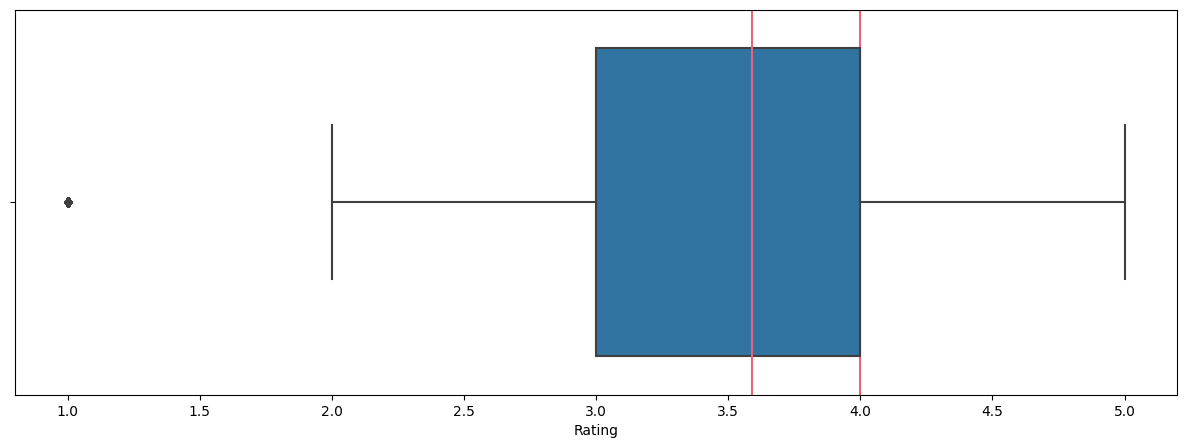

In [26]:
plt.figure(figsize=(15,5))

sns.boxplot(x=rate['Rating'])
plt.axvline(x=rate['Rating'].mean(), color='#E96479',linestyle='-')
plt.axvline(x=rate['Rating'].median(), color='#E96479',linestyle='-')

In [3]:
test=pd.DataFrame(rate.groupby('User_ID')['Rating'].median())
rate=pd.merge(rate,test, how='left', on='User_ID')

In [4]:
df=rate[rate['Rating_x']>=rate['Rating_y']]
df.shape

(12056712, 4)

In [5]:
df=df[['User_ID','Movie_ID']]

# 3. 분석

In [49]:
df.shape

(12056712, 2)

In [51]:
movie_list=pd.DataFrame(df['Movie_ID'].value_counts()[:1350])['Movie_ID']
test=df[df['Movie_ID'].isin(movie_list)]

In [52]:
test.shape

(1888894, 2)

In [41]:
df1=pd.get_dummies(test, columns = ['Movie_ID'])

In [42]:
df1.head()

,User_ID,Movie_ID_1756,Movie_ID_1757,Movie_ID_1794,Movie_ID_1799,Movie_ID_1833,Movie_ID_1837,Movie_ID_1851,Movie_ID_1865,Movie_ID_1866,...,Movie_ID_3925,Movie_ID_3935,Movie_ID_3942,Movie_ID_4207,Movie_ID_4255,Movie_ID_4271,Movie_ID_4387,Movie_ID_4441,Movie_ID_4474,Movie_ID_4478
6424397,2541216,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6424400,1907667,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6424402,716091,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6424403,426397,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6424404,1945809,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
len(df['Movie_ID'].unique())

1350

In [48]:
df['Movie_ID'].value_counts()

1905    101103
4306     93747
2452     93368
3962     87466
2862     87030
         ...  
717        492
1293       471
360        465
761        418
2276       396
Name: Movie_ID, Length: 1350, dtype: int64

In [53]:
sum(df['Movie_ID'].isnull())

0